In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [4]:
breast_cancer_data = sklearn.datasets.load_breast_cancer()

print(type(breast_cancer_data))

<class 'sklearn.utils._bunch.Bunch'>


In [5]:
# Loading the data to a data form

data_frame = pd.DataFrame(breast_cancer_data.data, columns  = breast_cancer_data.feature_names)

print(type(data_frame))

<class 'pandas.core.frame.DataFrame'>


In [6]:
# Adding the target column to the data frame

data_frame['label'] = breast_cancer_data.target

In [7]:
data_frame.shape

(569, 31)

In [8]:
# Getting some information about the data

data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
# Checking for missing values

data_frame.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [10]:
# Statistical measures of the data

data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [11]:
# Checking the distribution of the target variable

data_frame['label'].value_counts()

,count
label,
1,357
0,212


In [12]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [17]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [18]:
# setting up the layers of Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# we use sparse_categorical_crossentropy because we have 2 classes only
# if we have more than 2 classes we use categorical_crossentropy

In [20]:
# training the Meural Network

history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.1798 - loss: 1.5242 - val_accuracy: 0.2826 - val_loss: 1.0621
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3115 - loss: 1.1566 - val_accuracy: 0.4130 - val_loss: 0.7961
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4551 - loss: 0.8779 - val_accuracy: 0.7174 - val_loss: 0.6019
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6240 - loss: 0.6683 - val_accuracy: 0.8696 - val_loss: 0.4635
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7752 - loss: 0.5128 - val_accuracy: 0.9565 - val_loss: 0.3665
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8644 - loss: 0.4019 - val_accuracy: 0.9565 - val_loss: 0.2985
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9005 - loss: 0.3246 - val_accuracy: 0.9783 - val_loss: 0.2504
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9086 - loss: 0.2710 - val_accuracy: 0.9783 - val_loss

In [21]:
model.evaluate(X_test_std, Y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9558 - loss: 0.1862 


[0.171039879322052, 0.9649122953414917]

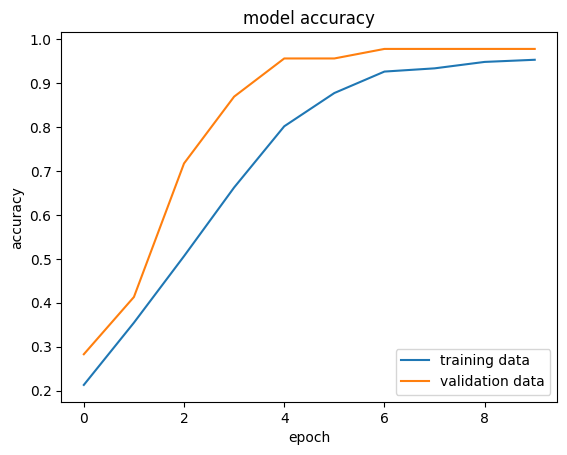

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc='lower right')


In [23]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9558 - loss: 0.1862 
Test Loss: 0.171039879322052
Test Accuracy: 0.9649122953414917


In [24]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [26]:
Y_pred = model.predict(X_test_std)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [27]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.4762275  0.61495936]


In [29]:
print(X_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [28]:
print(Y_pred)

[[0.4762275  0.61495936]
 [0.4869588  0.5036833 ]
 [0.14685133 0.85374975]
 [0.99998343 0.9052172 ]
 [0.57059526 0.51433605]
 [0.9962447  0.74541706]
 [0.3215781  0.6594678 ]
 [0.16810974 0.8162588 ]
 [0.27384743 0.66371906]
 [0.14526233 0.5765608 ]
 [0.41947642 0.59502834]
 [0.3676985  0.7880878 ]
 [0.4073127  0.699452  ]
 [0.43550754 0.6420659 ]
 [0.18457647 0.7157375 ]
 [0.91308665 0.49681485]
 [0.0904154  0.6964487 ]
 [0.16578157 0.7376981 ]
 [0.25329444 0.5933808 ]
 [0.99338084 0.7261035 ]
 [0.08580363 0.10692219]
 [0.11145969 0.7282781 ]
 [0.09534036 0.7575685 ]
 [0.16637598 0.7735547 ]
 [0.30027106 0.6148653 ]
 [0.97745025 0.76807666]
 [0.3174149  0.68453896]
 [0.3757858  0.62176275]
 [0.9443138  0.7024362 ]
 [0.95891696 0.64714324]
 [0.18355778 0.54595095]
 [0.30480993 0.7766568 ]
 [0.16371314 0.59589756]
 [0.99881774 0.6346215 ]
 [0.9955843  0.80445415]
 [0.10586375 0.46511683]
 [0.05847847 0.7670264 ]
 [0.2814381  0.550834  ]
 [0.15911584 0.85260355]
 [0.2647894  0.69962186]


model.predict() gives the prediction probability for each class

In [32]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]

print(Y_pred_labels)


[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [33]:
Y_test_labels = [np.argmax(i) for i in Y_test]
print(Y_test_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


**Building The predictive system**

In [ ]:
# Give the data_point a row of features to predict
data_point =

input_data = (data_point)

# Change the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we ar predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Standrizing the input_data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if (prediction_label[0] == 0):
  print('The Breast Cancer is Malignant')

else:
  print('The Breast Cancer is Benign')